# NLP : field of computer science used to process the interaction btw computers and human language

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.set_style("darkgrid")
# this is used to remove unwaned warnings as the data set is used is of small size
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

reviews.didPurchase , reviews.id , reviews.userCity , reviews.userProvince are completely empty so no use of them 

In [5]:
data=df.copy()
data.describe()


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


rating info and review helpful rating is important to analyse data later

<AxesSubplot:>

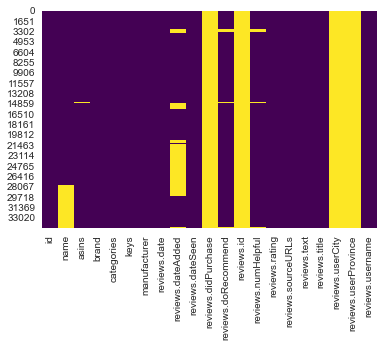

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

we can remove reviews.userCity,reviews.userProvince,reviews_id 

In [7]:
df.drop(['reviews.id'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.numHelpful    34131 non-null  float64
 13  reviews.rating        34627 non-null  float64
 14  reviews.sourceURLs    34660 non-null  object 
 15  reviews.text       

In [8]:
df.drop(['reviews.didPurchase'],inplace =True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [9]:
df.describe()

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,34131.000000,34627.000000,0.0,0.0
mean,0.630248,4.584573,NaN,NaN
std,13.215775,0.735653,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,4.000000,NaN,NaN
50%,0.000000,5.000000,NaN,NaN
75%,0.000000,5.000000,NaN,NaN
max,814.000000,5.000000,NaN,NaN


Avg review rating =4.58.
Avg review helpful is 0.6 but with high standard deviation so there are people whose reviews are imp and whose are not imp. Reviews lie btw 0-13 people finding helpful. 
Review that was most helful was to 814 people. 

In [10]:
# making a copy for eda where we can drop strings and work on numerical values only
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [11]:
print(data['asins'].unique())
asins_unique=len(data['asins'].unique())
print("Number of Unique asins: "+str(asins_unique))

['B01AHB9CN2' 'B00VINDBJK' 'B005PB2T0S' 'B002Y27P3M' 'B01AHB9CYG'
 'B01AHB9C1E' 'B01J2G4VBG' 'B00ZV9PXP2' 'B0083Q04TA' 'B018Y229OU'
 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' nan 'B00DU15MU4' 'B018Y225IA'
 'B005PB2T2Q' 'B018Y23MNM' 'B00OQVZDJM' 'B00IOY8XWQ' 'B00LO29KXQ'
 'B00QJDU3KY' 'B018Y22C2Y' 'B01BFIBRIE' 'B01J4ORNHU' 'B018SZT3BK'
 'B00UH4D8G2' 'B018Y22BI4' 'B00TSUGXKE' 'B00L9EPT8O,B01E6AO69U'
 'B018Y23P7K' 'B00X4WHP5E' 'B00QFQRELG' 'B00LW9XOJM' 'B00QL1ZN3G'
 'B0189XYY0Q' 'B01BH83OOM' 'B00BFJAHF8' 'B00U3FPN4U' 'B002Y27P6Y'
 'B006GWO5NE' 'B006GWO5WK']
Number of Unique asins: 42


unique number of asins means number of different type of products 

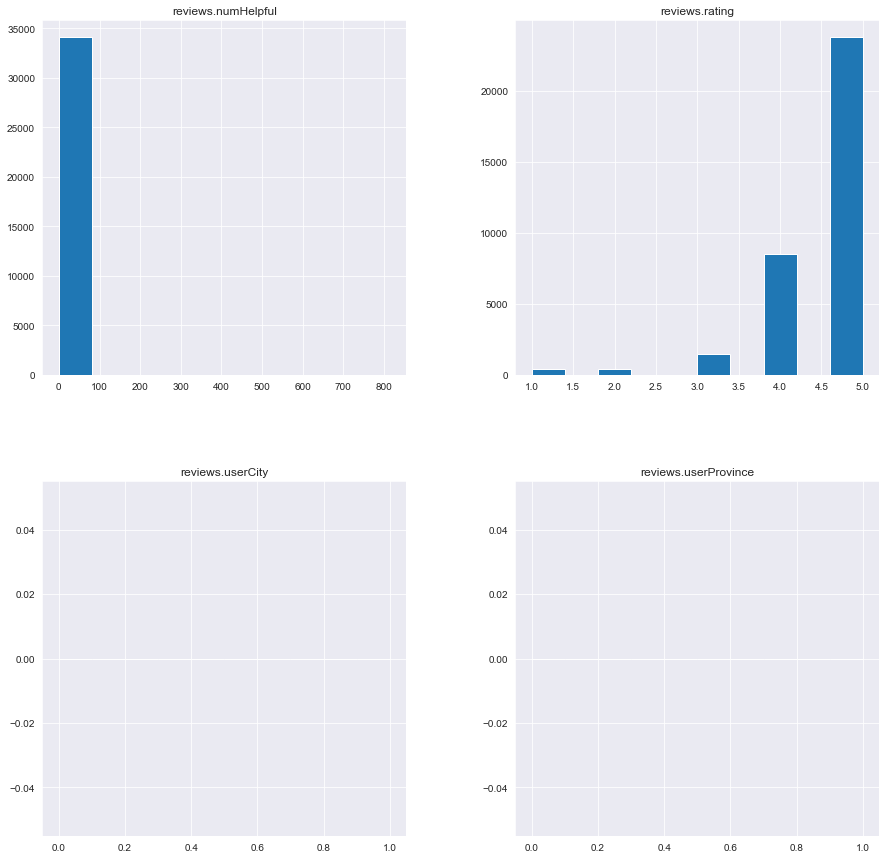

In [12]:
data.hist(figsize=(15,15))
plt.show()

reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful. reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined so problem arises when we train it with only high rating so it won't give proper result in negative rating. So we use stratified shuffle split 

# Train test split with stratified shuffle

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# so in this stratified shuffle split , the data is shuffled everytime after a split 
# so now no one type of data will be there in training dataset which makes it well trained for differnet datasets


we use this split when our dataset is too biased to one section so to balance it we shuffle it after every insertion of datapoint 

In [14]:
print("Before {}".format(len(data)))
# now removing all null values from review.rating
data_after=data.dropna(subset=['reviews.rating'])
print("After {}".format(len(data_after)))
data_after['reviews.rating']=data_after['reviews.rating'].astype(int)

Before 34660
After 34627


In [18]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(data_after,data_after["reviews.rating"]):
    strat_train=data_after.reindex(train_index)
    strat_test=data_after.reindex(test_index)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
22428,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-06-21T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Easy to set up and start using. Love having an...,Easy to use,NaN,NaN,Paducah
21958,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-05-12T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,The Echo is the coolest thing! I love it. I ev...,Love it!,NaN,NaN,Matt
14544,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-12T00:00:00.000Z,2017-07-02T14:36:33Z,2017-06-07T08:14:00.000Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Tablet is easy to use. Gives options for passw...,Awesome tablet for a child,NaN,NaN,Irishfan317
29327,AVpfpK8KLJeJML43BCuD,NaN,B01BH83OOM,Amazon Echo,"Featured Brands,Electronics,Amazon Devices,Hom...","amazonecho/b01bh83oom,amazon/b01bh83oom,amazon...",Amazon,2016-12-31T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5097300/review...,"It's not the echo but for what I paid, it's we...",Love my tap,NaN,NaN,Ces0983
20449,AV1YnRtnglJLPUi8IJmV,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2017-01-18T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:32:40.985Z,2017-08-02T19:53:19.4...",True,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,I was not sure about making the jump to an e-r...,Great reader,NaN,NaN,billc


So here we can see that we get randomised row in our training dataset by using stratified shuffle split

In [18]:
len(strat_train)

27701

In [21]:
len(strat_test)

6926

In [22]:
strat_train["reviews.rating"].value_counts()/len(strat_train)
# this is to get percentage of each of the ratings 

5.0    0.685751
4.0    0.246706
3.0    0.043897
2.0    0.011408
1.0    0.011335
Name: reviews.rating, dtype: float64

In [23]:
strat_test["reviews.rating"].value_counts()/len(strat_test)
# this is to get percentage of each of the ratings 

5.0    0.687554
4.0    0.246029
3.0    0.040572
1.0    0.012417
2.0    0.012273
Name: reviews.rating, dtype: float64

so stratified shuffle split helps in giving more appropriate answers as what if it is arranged in some way that 1* max rating comes in strat_train . so it helps in avg in out

# Data Exploration(training set)

In [25]:
reviews=strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
22428,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-06-21T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Easy to set up and start using. Love having an...,Easy to use,NaN,NaN,Paducah
21958,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-05-12T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,The Echo is the coolest thing! I love it. I ev...,Love it!,NaN,NaN,Matt


In [28]:
len(reviews['name'].unique()),len(reviews['asins'].unique())

(48, 35)

so we have 35 products in training data ASINs but more product names 48

so we have one to many relationship btw asins and names. A single asin can have different name due to different seller

In [29]:
# so its better to group by on the basis of asins
reviews.groupby('asins')['name'].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nKin...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Amazon Fire Hd 8 8in Tablet 16gb Black B018sz...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

we are concerned with product ratings and reviews so we take care of asins only

In [25]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 7788 to 18578
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22328 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27653 non-null  object 
 8   reviews.dateAdded     19180 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.doRecommend   27252 non-null  object 
 11  reviews.numHelpful    27298 non-null  float64
 12  reviews.rating        27673 non-null  float64
 13  reviews.sourceURLs    27673 non-null  object 
 14  reviews.text          27672 non-null  object 
 15  reviews.title   

# Asins/Names with ratings

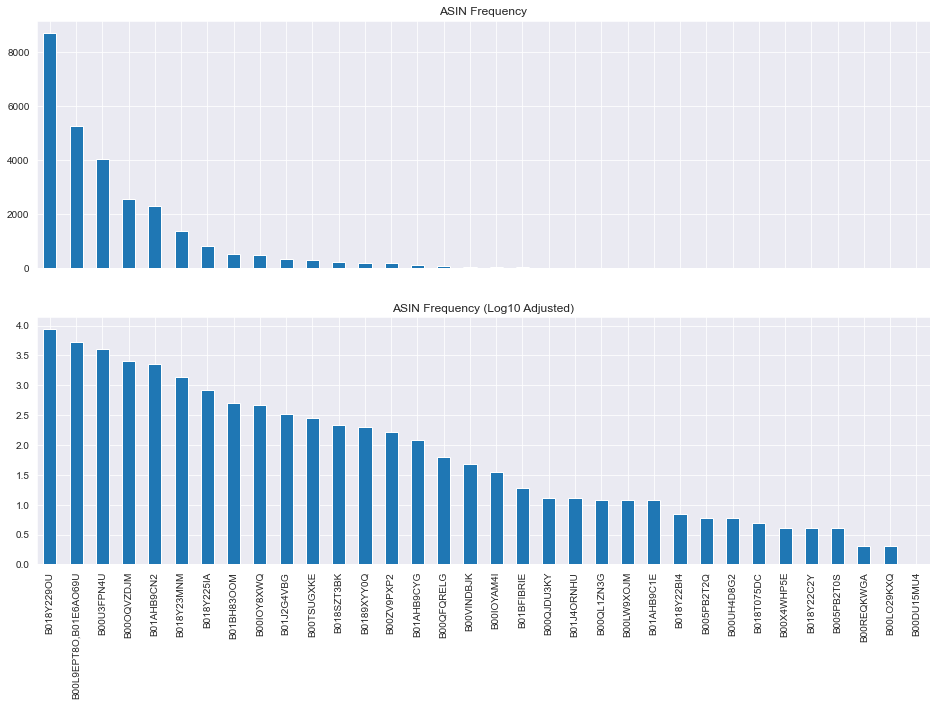

In [44]:
fig = plt.figure(figsize=(16,10))
# we use subplot when we have to see interrelationship btw two graphs
ax1 = plt.subplot(2,1,1)
# this 2,1,1 is 2nd row 1st column 1st plot 
ax2 = plt.subplot(2,1,2, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
# The ax (or Axes object) is the area of the figure where your data appears
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="ASIN Frequency (Log10 Adjusted)") 
# np.log10 normalises our data to visualize it better 
plt.show()

so we know that what asins have max number of people rating . And this answers which asins have most sales 

# ASINS/Reviews

In [46]:
reviews['reviews.rating'].mean()
# trianing data set rating mean

4.5855614973262036

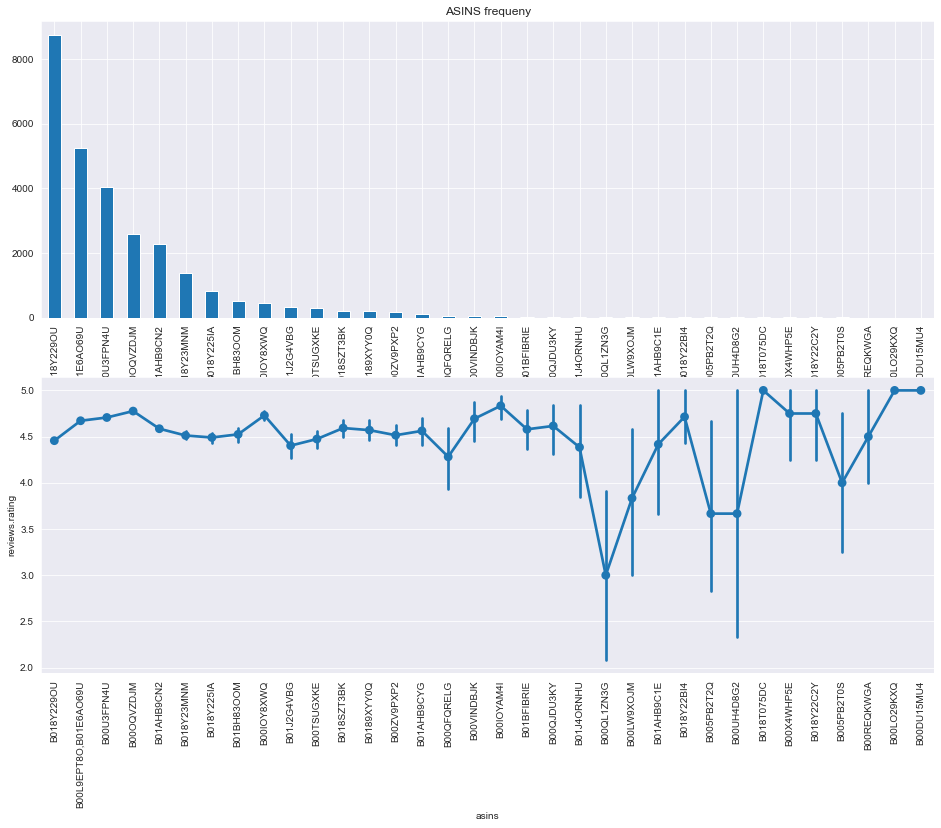

In [56]:
# now we will use pointplot to see our number of those people giving ratings
asins_count=reviews['asins'].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

so we have info about rating of product and no. of reviews given on that asin.Here dots are means and lines extremes show max min rating value.So now we can do analysis of products quality using no. of users

# reviews.doRecommend/ASINs

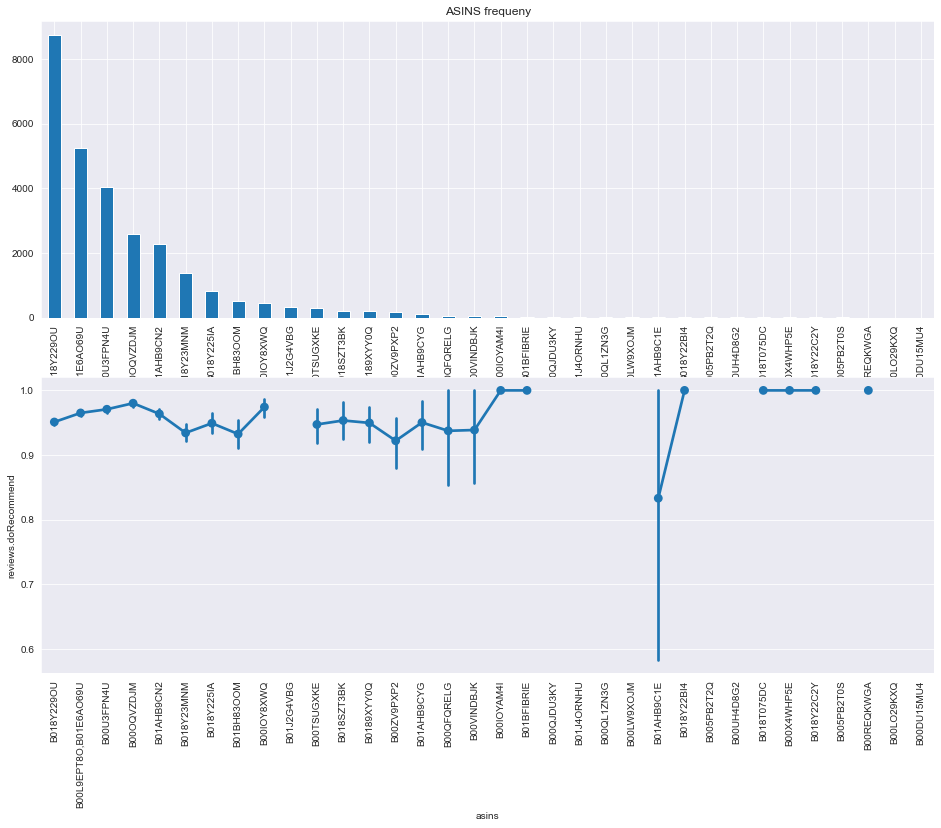

In [58]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

Info about which product is more frequently recommended and if its sold more or not based on that recommendation

# Correlations

In [59]:
corr_matrix=reviews.corr()
corr_matrix

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.numHelpful,1.000000,-0.045884,NaN,NaN
reviews.rating,-0.045884,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN


In [75]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.666667
B00DU15MU4,5.000000
B00IOY8XWQ,4.729614
B00IOYAM4I,4.833333
"B00L9EPT8O,B01E6AO69U",4.671548
B00LO29KXQ,5.000000
B00LW9XOJM,3.833333
B00OQVZDJM,4.776050


Id's and mean of the product belonging to that id

In [85]:
table=avg_rating.join(counts)
table

,reviews.rating,asins
asins,,
B005PB2T0S,4.000000,4
B005PB2T2Q,3.666667,6
B00DU15MU4,5.000000,1
B00IOY8XWQ,4.729614,466
B00IOYAM4I,4.833333,36
"B00L9EPT8O,B01E6AO69U",4.671548,5258
B00LO29KXQ,5.000000,2
B00LW9XOJM,3.833333,12
B00OQVZDJM,4.776050,2572


,reviews.rating,asins
reviews.rating,1.000000,0.117104
asins,0.117104,1.000000


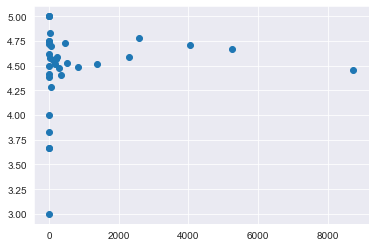

In [83]:
plt.scatter("asins","reviews.rating",data=table)
table.corr()

# Sentiment Analysis

In [88]:
def sentiments(rating):
    if(rating==5)or(rating==4):
        return "Positive"
    elif rating==3:
        return "Neutral"
    elif(rating==2)or(rating==1):
        return "Negative"

In [89]:
# now adding this sentiments function to training and testing dataset
strat_train['Sentiments']=strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiments']=strat_test['reviews.rating'].apply(sentiments)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Sentiments
22428,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-06-21T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Easy to set up and start using. Love having an...,Easy to use,NaN,NaN,Paducah,Positive
21958,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-05-12T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,The Echo is the coolest thing! I love it. I ev...,Love it!,NaN,NaN,Matt,Positive
14544,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-12T00:00:00.000Z,2017-07-02T14:36:33Z,2017-06-07T08:14:00.000Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Tablet is easy to use. Gives options for passw...,Awesome tablet for a child,NaN,NaN,Irishfan317,Positive
29327,AVpfpK8KLJeJML43BCuD,NaN,B01BH83OOM,Amazon Echo,"Featured Brands,Electronics,Amazon Devices,Hom...","amazonecho/b01bh83oom,amazon/b01bh83oom,amazon...",Amazon,2016-12-31T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5097300/review...,"It's not the echo but for what I paid, it's we...",Love my tap,NaN,NaN,Ces0983,Positive
20449,AV1YnRtnglJLPUi8IJmV,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2017-01-18T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:32:40.985Z,2017-08-02T19:53:19.4...",True,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,I was not sure about making the jump to an e-r...,Great reader,NaN,NaN,billc,Positive


# Preparing text data 

In [90]:
x_train=strat_train['reviews.text']
x_train_targetsentiment=strat_train['Sentiments']
x_test=strat_test['reviews.text']
x_test_targetsentiment=strat_test['Sentiments']
print(len(x_train),len(x_test))

27701 6926


# Extracting features

In [92]:

# tokenisation: which breaks sentences into words
# stopwords: filtering unwanted words like the ,are etc.
# filling na with space 
x_train=x_train.fillna(' ')
x_test=x_test.fillna(' ')
x_train_targetsentiment=x_train_targetsentiment.fillna(' ')
x_test_targetsentiment=x_test_targetsentiment.fillna(' ')

In [93]:
# Text preprocessing and occurence counting using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(x_train)
x_train_counts.shape

(27701, 12548)

here we have 27k samples and 12k distinct words

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer=TfidfTransformer(use_idf=False)
x_train_tfid=tfid_transformer.fit_transform(x_train_counts)
x_train_tfid.shape

(27701, 12548)

so tfidf transformer reduces less meaning words which have higher occurence . So it divides the number of occurences for each word by total number of words. Downscales stop words like "the" "are" etc.

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe=Pipeline([('vect',CountVectorizer()),
                               ("tfidf",TfidfTransformer()),
                               ("clf_nominalNB",MultinomialNB())])
clf_multiNB_pipe.fit(x_train,x_train_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

we use pipeline from sklearn when we want a number of tasks to be implemented on every datapoint

In [113]:
predict_multiNB=clf_multiNB_pipe.predict(x_test)
predict_multiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [114]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(x_test_targetsentiment,predict_multiNB)))

Accuracy: 0.9335835980363847


We have attained accuracy of 94% on our testing data . 

In [115]:
x_test

29469    I spent more time trying get it functioning th...
4883     This a good tablet. How ever I made it better ...
28670    This is clearly taking advantaged of Kindle cu...
18269    Found information very readable and prices com...
4131     The tablet exceeds the price expectations. Gre...
                               ...                        
16301    Great for the grandkids, they know how to mana...
30893    Works great, a gift for my daughter for Christ...
18907    Bought this for my 78 year old mother who had ...
11038    This isn't the best tablet, but for casual gam...
3480     The sales people are really nice and knowledge...
Name: reviews.text, Length: 6926, dtype: object

# Applying model on input text

In [117]:
new_text=["the tablet is good , really liked it",
         "the tablet is ok",
         "bad tablet ever"]
clf_multiNB_pipe.predict(new_text)

array(['Positive', 'Positive', 'Positive'], dtype='<U8')